# Demo: Dataset introduction
 
This is an introduction to get started with the MetObs toolkit. These examples are making use of the demo data files that come with the toolkit.
Once the MetObs toolkit package is installed, you can import its functionality by:

In [1]:
import metobs_toolkit

## The Dataset

A dataset is a collection of all observational data. Most of the methods are
applied directly to a dataset. Start by creating an empty Dataset object:

In [2]:
your_dataset = metobs_toolkit.Dataset()
print(your_dataset) #prints out minimal info of your dataset

Empty instance of Dataset


The most relevant attributes of a Dataset are:
    
 * `Datset.df` --> a pandas DataFrame where all the observational data are stored
 * `Datset.metadf` --> a pandas DataFrame where all the metadata for each station are stored
 * `Datset.settings` --> a Settings object to store all specific settings.
 * `Datset.gaps` --> here the gaps are stored if present.
 * `Datset.obstypes` --> all the known observation types of the dataset
 * `Datset.gee_datasets` --> all the known GeeModelData's (interaction with Google Earth Engine datasets).

Note that each Dataset will be equipped with the default settings.

We created a dataset and stored it under the variable 'your_dataset'.
The show method prints out an overview of data in the dataset:

In [3]:
your_dataset.show() # or .get_info()

--------  General --------- 

Empty instance of Dataset

 --------  Observation types --------- 

temp observation with: 
     * standard unit: Celsius 
     * data column as None in None 
     * known units and aliases: {'Celsius': ['celsius', '°C', '°c', 'celcius', 'Celcius'], 'Kelvin': ['K', 'kelvin'], 'Fahrenheit': ['fahrenheit']} 
     * description: 2m - temperature 
     * conversions to known units: {'Kelvin': ['x - 273.15'], 'Fahrenheit': ['x-32.0', 'x/1.8']} 
     * originates from data column: None with None as native unit.
humidity observation with: 
     * standard unit: % 
     * data column as None in None 
     * known units and aliases: {'%': ['percent', 'percentage']} 
     * description: 2m - relative humidity 
     * conversions to known units: {} 
     * originates from data column: None with None as native unit.
radiation_temp observation with: 
     * standard unit: Celsius 
     * data column as None in None 
     * known units and aliases: {'Celsius': ['celsius

## Importing data

To import your data into a Dataset, the following files are required:

* data file: This is the CSV file containing the observations
* (optional) metadata file: The CSV file containing metadata for all stations.
* template file: This is a (json) file that is used to interpret your data, and metadata file (if present).

In practice, you need to start by creating a template file for your data. More information on creating the template can be found in the documentation (under [Mapping to the toolkit](https://metobs-toolkit.readthedocs.io/en/latest/topics/template_mapping.html)).

TIP: *Use the `build_template_prompt()` of the toolkit for creating a template file.*


In [4]:
# metobs_toolkit.build_template_prompt()

To import data, you must specify the paths to your data, metadata and template.
For this example, we use the demo data, metadata and template that come with the toolkit.

In [5]:
your_dataset.update_file_paths(
    input_data_file=metobs_toolkit.demo_datafile, # path to the data file
    input_metadata_file=metobs_toolkit.demo_metadatafile,
    template_file=metobs_toolkit.demo_template,
)

The settings of your Dataset are updated with the required paths. Now the data can be imported into your empty Dataset:

In [6]:
your_dataset.import_data_from_file()

Luchtdruk is present in the datafile, but not found in the template! This column will be ignored.


Neerslagintensiteit is present in the datafile, but not found in the template! This column will be ignored.


Neerslagsom is present in the datafile, but not found in the template! This column will be ignored.


Rukwind is present in the datafile, but not found in the template! This column will be ignored.


Luchtdruk_Zeeniveau is present in the datafile, but not found in the template! This column will be ignored.


Globe Temperatuur is present in the datafile, but not found in the template! This column will be ignored.


These stations will be removed because of only having one record: []


## Inspecting the Template

In practice, you need to start by creating a template file for your data. The role of the template is to translate your data and metadata file, to a standard structure used by the toolkit. It is thus the explanation of how your raw data is structured.
More information on the creation of the template can be found in the documentation (under [Mapping to the toolkit](https://metobs-toolkit.readthedocs.io/en/latest/topics/template_mapping.html)).

**TIP**: *Use the `build_template_prompt()` of the toolkit for creating a template file.*

As an illustration, you can use the `get_info()` method on the template attribute to print out an overview of the template:

In [7]:
your_dataset.template.get_info()

------ Data obstypes map ---------
 * temp            <---> Temperatuur    
     (raw data in Celsius)
     (description: 2mT passive)

 * humidity        <---> Vochtigheid    
     (raw data in %)
     (description: 2m relative humidity passive)

 * wind_speed      <---> Windsnelheid   
     (raw data in km/h)
     (description: Average 2m  10-min windspeed)

 * wind_direction  <---> Windrichting   
     (raw data in ° from north (CW))
     (description: Average 2m  10-min windspeed)


------ Data extra mapping info ---------
 * name column (data) <---> Vlinder

------ Data timestamp map ---------
 * datetimecolumn  <---> None           
 * time_column     <---> Tijd (UTC)     
 * date_column     <---> Datum          
 * fmt             <---> %Y-%m-%d %H:%M:%S
 * Timezone        <---> UTC

------ Metadata map ---------
 * name            <---> Vlinder        
 * lat             <---> lat            
 * lon             <---> lon            
 * school          <---> school         


**TIP**: *the `get_info()` method works on all objects of the Metobs toolkit.*

## Inspecting the Data

To get an overview of the data stored in your Dataset you can use

In [8]:
print(your_dataset)

Dataset instance containing:
     *28 stations
     *['humidity', 'temp', 'wind_direction', 'wind_speed'] observation types present
     *483828 observation records (not Nan's)
     *0 records labeled as outliers
     *8 gaps
     *records range: 2022-09-01 00:00:00+00:00 --> 2022-09-15 23:55:00+00:00 (total duration:  14 days 23:55:00)
     *time zone of the records: UTC
     *Coordinates are available for all stations.
     *Known GEE datasets for: ['lcz', 'altitude', 'worldcover', 'ERA5-land']


Or you can use the `.get_info()` method to print out more details.

If you want to inspect the data in your Dataset directly, you can take a look at the .df and .metadf attributes

In [9]:
print(your_dataset.df.head())
# equivalent for the metadata
print(your_dataset.metadf.head())


                                              value
name      obstype  datetime                        
vlinder01 humidity 2022-09-01 00:00:00+00:00   65.0
                   2022-09-01 00:05:00+00:00   65.0
                   2022-09-01 00:10:00+00:00   65.0
                   2022-09-01 00:15:00+00:00   65.0
                   2022-09-01 00:20:00+00:00   65.0
                 lat       lon        school                  geometry  \
name                                                                     
vlinder01  50.980438  3.815763         UGent  POINT (3.81576 50.98044)   
vlinder02  51.022379  3.709695         UGent   POINT (3.7097 51.02238)   
vlinder03  51.324583  4.952109   Heilig Graf  POINT (4.95211 51.32458)   
vlinder04  51.335522  4.934732   Heilig Graf  POINT (4.93473 51.33552)   
vlinder05  51.052655  3.675183  Sint-Barbara  POINT (3.67518 51.05266)   

          dataset_resolution                  dt_start  \
name                                                     
v

### Inspecting a Station

If you are interested in one station, you can extract all the info for that one station from the dataset by:


In [10]:
favorite_station = your_dataset.get_station(stationname="vlinder02")

Favorite station now contains all the information of that one station. All methods that are applicable to a Dataset are also applicable to a Station. So to inspect your favorite station, you can:

In [11]:
print(favorite_station.show())

--------  General --------- 

Station instance containing:
     *1 stations
     *['humidity', 'temp', 'wind_direction', 'wind_speed'] observation types present
     *17268 observation records (not Nan's)
     *0 records labeled as outliers
     *8 gaps
     *records range: 2022-09-01 00:00:00+00:00 --> 2022-09-15 23:55:00+00:00 (total duration:  14 days 23:55:00)
     *time zone of the records: UTC
     *Coordinates are available for all stations.
     *Known GEE datasets for: ['lcz', 'altitude', 'worldcover', 'ERA5-land']

 --------  Observation types --------- 

temp observation with: 
     * standard unit: Celsius 
     * data column as Temperatuur in Celsius 
     * known units and aliases: {'Celsius': ['celsius', '°C', '°c', 'celcius', 'Celcius'], 'Kelvin': ['K', 'kelvin'], 'Fahrenheit': ['fahrenheit']} 
     * description: 2mT passive 
     * conversions to known units: {'Kelvin': ['x - 273.15'], 'Fahrenheit': ['x-32.0', 'x/1.8']} 
     * originates from data column: Temperatuur

## Making timeseries plots

To make timeseries plots, use the following syntax to plot the *temperature* observations of the full Dataset:

In [12]:
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None} #else the legend is cutoff in ipython inline plots

colormap: tab20, is not well suited to color 28 categories.


<Axes: title={'center': 'Temperatuur for all stations. '}, ylabel='temp (Celsius)'>

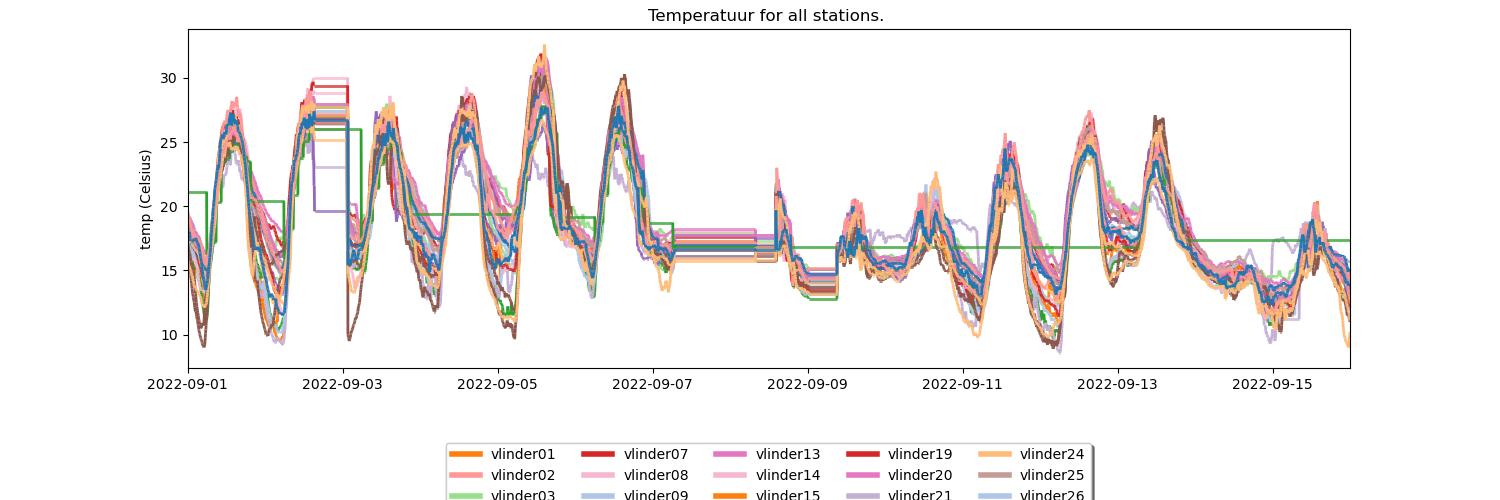

In [13]:
your_dataset.make_plot(obstype='temp')

See the documentation of the ``make_plot()`` method for more details. Here is an example of commonly used arguments.

<Axes: title={'center': 'your custom title'}, xlabel='datetime', ylabel='humidity (%)'>

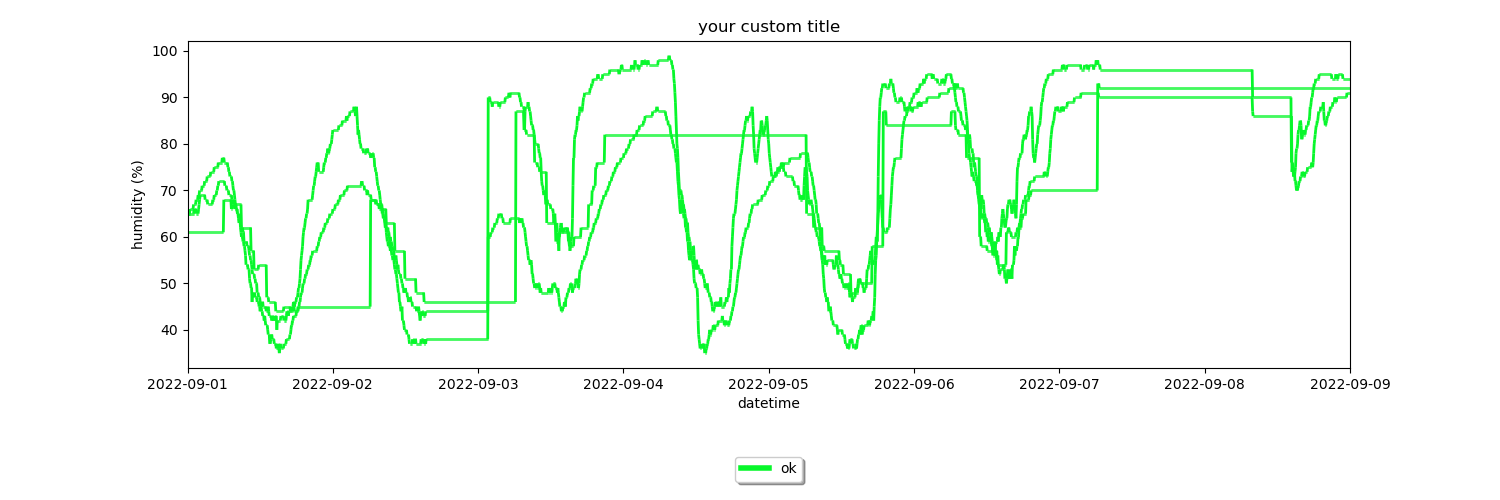

In [14]:
#Import the standard datetime library to make timestamps from datetime objects
from datetime import datetime

your_dataset.make_plot(
    # specify the names of the stations in a list, or use None to plot all of them.
    stationnames=['vlinder01', 'vlinder03', 'vlinder05'],
    # what obstype to plot (default is 'temp')
    obstype="humidity",
    # choose how to color the timeseries:
    #'name' : a specific color per station
    #'label': a specific color per quality control label
    colorby="label",
    # choose a start and endtime for the series (datetime).
    # Default is None, which uses all available data
    starttime=None,
    endtime=datetime(2022, 9, 9),
    # Specify a title if you do not want the default title
    title='your custom title',
    # Add legend to plot?, by default true
    legend=True,
    # Plot observations that are labeled as outliers.
    show_outliers=True,
)

as mentioned above, one can apply the same methods to a Station object:

/home/thoverga/Documents/VLINDER_github/MetObs_toolkit/metobs_toolkit/dataset_core.py:509: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combdf = pd.concat([df, outliersdf])  # combine the two


<Axes: title={'center': 'Temperatuur of vlinder02'}, xlabel='datetime', ylabel='temp (Celsius)'>

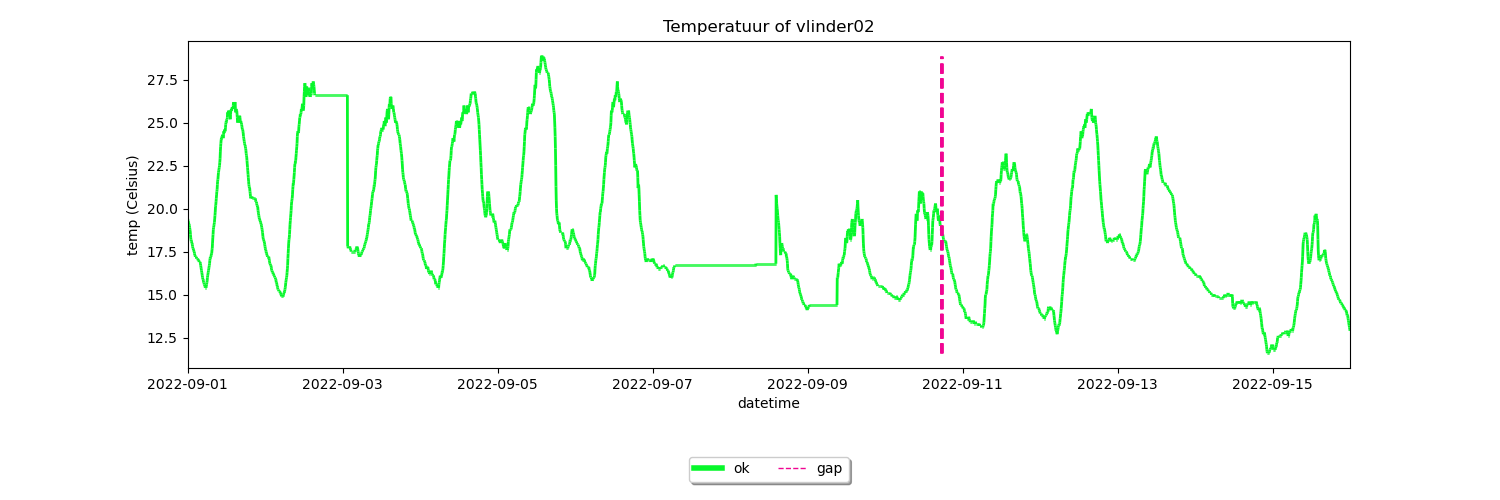

In [15]:
favorite_station.make_plot(colorby='label')

## Resampling the time resolution

Coarsening the time resolution (i.g. frequency) of your data can be done by using the ``coarsen_time_resolution()``.

In [16]:
your_dataset.coarsen_time_resolution(freq='30min') #'30min' means 30 minutes

your_dataset.df.head()

A 0 days 00:00:00 is given as an argument for a timedelta.


value
name      obstype  datetime                        
vlinder01 humidity 2022-09-01 00:00:00+00:00   65.0
                   2022-09-01 00:30:00+00:00   65.0
                   2022-09-01 01:00:00+00:00   65.0
                   2022-09-01 01:30:00+00:00   65.0
                   2022-09-01 02:00:00+00:00   68.0